In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml3.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 288)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Columns: 288 entries, avgAnnCount to PctSomeCol18_24_sqrd
dtypes: bool(66), float64(132), int64(90)
memory usage: 5.4+ MB


In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_AC

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,povertyPercent_log,povertyPercent_sqrd,MedianAge_log,MedianAgeFemale_sqrd,AvgHouseholdSize_log,PercentMarried_log,PercentMarried_sqrd,PctSomeCol18_24_log,PctSomeCol18_24_sqrd
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'POPLOSS00', 'povertyPercent_log', 'povertyPercent_sqrd', 'MedianAge_log', 'MedianAgeFemale_sqrd', 'AvgHouseholdSize_log', 'PercentMarried_log', 'PercentMarried_sqrd', 'PctSomeCol18_24_log', 'PctSomeCol18_24_sqrd'], dtype='object', length=288)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 288)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion to make a good fit. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'POPLOSS00', 'povertyPercent_log', 'povertyPercent_sqrd', 'MedianAge_log', 'MedianAgeFemale_sqrd', 'AvgHouseholdSize_log', 'PercentMarried_log', 'PercentMarried_sqrd', 'PctSomeCol18_24_log', 'PctSomeCol18_24_sqrd'], dtype='object', length=287)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X_test, y_test)

0.6013037104868681

## 'PctHS25_Over': Percent of county residents ages 25 and over highest education attained: high school diploma

In [19]:
X['PctHS25_Over_log'] = np.log(X['PctHS25_Over'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lr.score(X_test, y_test)

0.6000342695510046

The logarithmic version results in a decrease in accuracy, so it is dropped from X.

In [23]:
X = X.drop(columns = 'PctHS25_Over_log')

In [24]:
X['PctHS25_Over_sqrd'] = X['PctHS25_Over']**2

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.score(X_test, y_test)

0.6014718306806253

The squared version increased the accuracy, so it is added to the core feature set.

In [28]:
cancer['PctHS25_Over_sqrd'] = cancer['PctHS25_Over']**2

In [29]:
X16 = np.array(cancer['PctHS25_Over'])
X16 = X16.reshape(-1, 1)

In [30]:
lr.fit(X16, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lr.score(X16, y)

0.16369232024158198

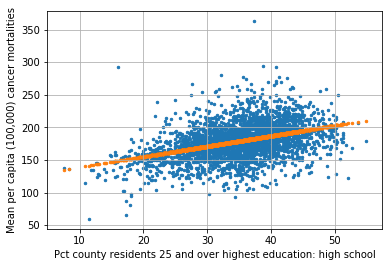

In [32]:
plt.scatter(X16, y, s=6)
plt.scatter(X16, lr.predict(X16), s=6)
plt.grid()
plt.xlabel("Pct county residents 25 and over highest education: high school", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctHS25_Over_actual_&_predicted_Y.png')

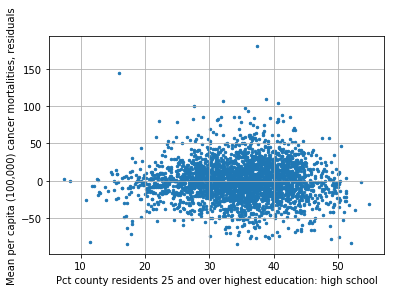

In [33]:
plt.scatter(X16, y - lr.predict(X16), s=6)
plt.grid()
plt.xlabel("Pct county residents 25 and over highest education: high school", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctHS25_Over_residuals.png')

In [34]:
X16.shape

(3047, 1)

In [35]:
dfx16 = pd.DataFrame(X16)
dfx16.head()

,0
0,37.5
1,39.2
2,39.9
3,21.4
4,44.7


In [36]:
dfx16['PctHS25_Over_sqrd'] = X16**2

In [37]:
dfx16.head()

,0,PctHS25_Over_sqrd
0,37.5,1406.25
1,39.2,1536.64
2,39.9,1592.01
3,21.4,457.96
4,44.7,1998.09


In [38]:
lr.fit(dfx16, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lr.score(dfx16, y)

0.17139574672869762

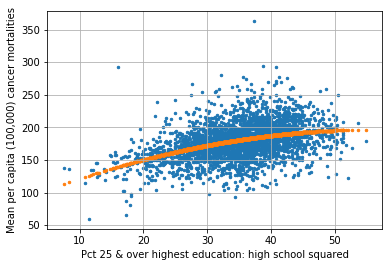

In [42]:
plt.scatter(X16, y, s=6) 
plt.scatter(X16, lr.predict(dfx16), s=6)
plt.grid()
plt.xlabel("Pct 25 & over highest education: high school squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctHS25_Over_sqrd_actual_&_predicted_Y.png')

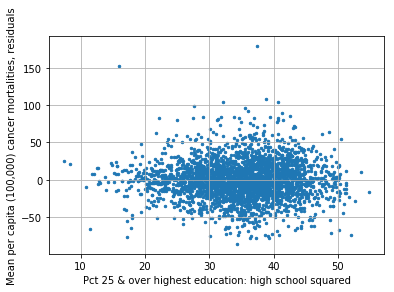

In [43]:
plt.scatter(X16, y - lr.predict(dfx16), s=6)
plt.grid()
plt.xlabel("Pct 25 & over highest education: high school squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctHS25_Over_sqrd_residuals.png')

## 'PctBachDeg25_Over': Percent of county residents ages 25 and over highest education attained: bachelor's degree 

In [44]:
X['PctBachDeg25_Over_log'] = np.log(X['PctBachDeg25_Over'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lr.score(X_test, y_test)

0.6019002296147364

The logarithmic version increased the accuracy score, so it is added to the core feature set.

In [48]:
cancer['PctBachDeg25_Over_log'] = np.log(cancer['PctBachDeg25_Over'])

In [49]:
X['PctBachDeg25_Over_sqrd'] = X['PctBachDeg25_Over']**2

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
lr.score(X_test, y_test)

0.600343978339802

The squared version decreased the accuracy, so it dropped from X.

In [53]:
X = X.drop(columns = 'PctBachDeg25_Over_sqrd')

In [54]:
X17 = np.array(cancer['PctBachDeg25_Over'])
X17 = X17.reshape(-1, 1)

In [55]:
lr.fit(X17, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
lr.score(X17, y)

0.23568822637766929

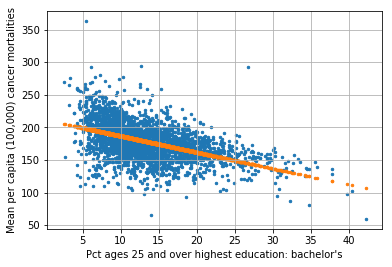

In [57]:
plt.scatter(X17, y, s=6)
plt.scatter(X17, lr.predict(X17), s=6)
plt.grid()
plt.xlabel("Pct ages 25 and over highest education: bachelor's", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctBachDeg25_Over_actual_&_predicted_Y.png')

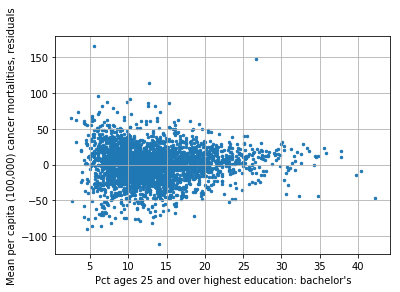

In [58]:
plt.scatter(X17, y - lr.predict(X17), s=6)
plt.grid()
plt.xlabel("Pct ages 25 and over highest education: bachelor's", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctBachDeg25_Over_residuals.png')

In [59]:
X17.shape

(3047, 1)

In [60]:
dfx17 = pd.DataFrame(X17)
dfx17.head()

,0
0,8.6
1,7.6
2,11.0
3,24.8
4,11.9


In [61]:
dfx17['PctBachDeg25_Over_log'] = np.log(X17)

In [62]:
dfx17.head()

,0,PctBachDeg25_Over_log
0,8.6,2.151762
1,7.6,2.028148
2,11.0,2.397895
3,24.8,3.210844
4,11.9,2.476538


In [63]:
lr.fit(dfx17, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lr.score(dfx17, y)

0.2469098237954399

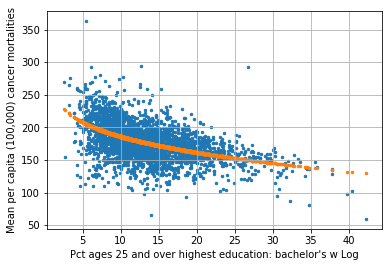

In [65]:
plt.scatter(X17, y, s=6) 
plt.scatter(X17, lr.predict(dfx17), s=6)
plt.grid()
plt.xlabel("Pct ages 25 and over highest education: bachelor's w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctBachDeg25_Over_log_actual_&_predicted_Y.png')

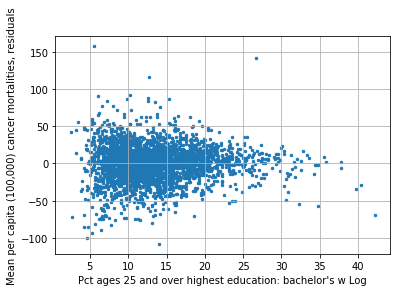

In [66]:
plt.scatter(X17, y - lr.predict(dfx17), s=6)
plt.grid()
plt.xlabel("Pct ages 25 and over highest education: bachelor's w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctBachDeg25_Over_log_residuals.png')

## 'PctEmployed16_Over': Percent of county residents ages 16 and over employed

In [67]:
X['PctEmployed16_Over_log'] = np.log(X['PctEmployed16_Over'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
lr.score(X_test, y_test)

0.6060515725190313

The logarithmic version increased the accuracy, so it is added to the core feature set.

In [71]:
cancer['PctEmployed16_Over_log'] = np.log(cancer['PctEmployed16_Over'])

In [72]:
X['PctEmployed16_Over_sqrd'] = X['PctEmployed16_Over']**2

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
lr.score(X_test, y_test)

0.6073534853411751

The squared version increased the accuracy further, so it is added to the core feature set.

In [76]:
cancer['PctEmployed16_Over_sqrd'] = cancer['PctEmployed16_Over']**2

In [77]:
X18 = np.array(cancer['PctEmployed16_Over'])
X18 = X18.reshape(-1, 1)

In [78]:
lr.fit(X18, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.score(X18, y)

0.15795262447594127

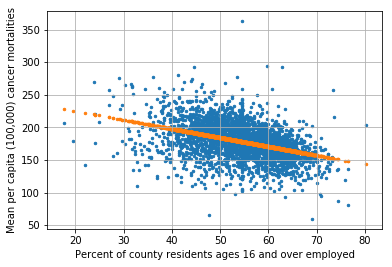

In [80]:
plt.scatter(X18, y, s=6)
plt.scatter(X18, lr.predict(X18), s=6)
plt.grid()
plt.xlabel("Percent of county residents ages 16 and over employed", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctEmployed16_Over_actual_&_predicted_Y.png')

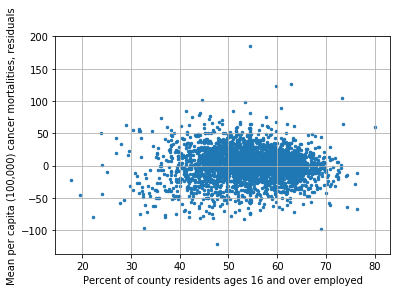

In [81]:
plt.scatter(X18, y - lr.predict(X18), s=6)
plt.grid()
plt.xlabel("Percent of county residents ages 16 and over employed", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctEmployed16_Over_residuals.png')

In [82]:
X18.shape

(3047, 1)

In [83]:
dfx18 = pd.DataFrame(X18)
dfx18.head()

,0
0,45.9
1,52.0
2,53.1
3,61.9
4,62.5


In [84]:
dfx18['PctEmployed16_Over_log'] = np.log(X18)

In [85]:
dfx18.head()

,0,PctEmployed16_Over_log
0,45.9,3.826465
1,52.0,3.951244
2,53.1,3.972177
3,61.9,4.125520
4,62.5,4.135167


In [86]:
lr.fit(dfx18, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
lr.score(dfx18, y)

0.16705772711118516

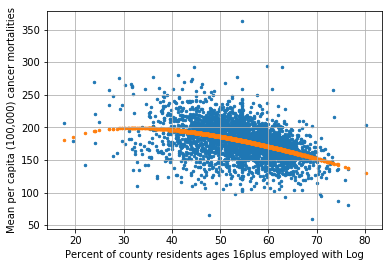

In [89]:
plt.scatter(X18, y, s=6) 
plt.scatter(X18, lr.predict(dfx18), s=6)
plt.grid()
plt.xlabel("Percent of county residents ages 16plus employed with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctEmployed16_Over_log_actual_&_predicted_Y.png')

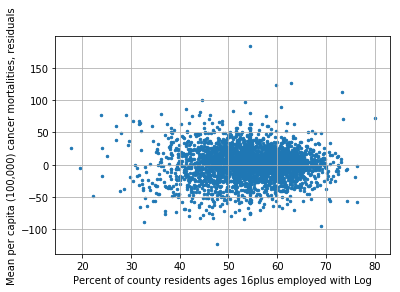

In [90]:
plt.scatter(X18, y - lr.predict(dfx18), s=6)
plt.grid()
plt.xlabel("Percent of county residents ages 16plus employed with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctEmployed16_Over_log_residuals.png')

In [91]:
dfx18['PctEmployed16_Over_sqrd'] = X18**2

In [92]:
dfx18.head()

,0,PctEmployed16_Over_log,PctEmployed16_Over_sqrd
0,45.9,3.826465,2106.81
1,52.0,3.951244,2704.00
2,53.1,3.972177,2819.61
3,61.9,4.125520,3831.61
4,62.5,4.135167,3906.25


In [93]:
lr.fit(dfx18, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
lr.score(dfx18, y)

0.16765028462541276

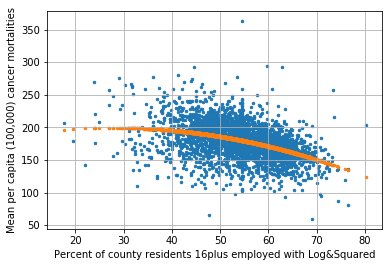

In [97]:
plt.scatter(X18, y, s=6) 
plt.scatter(X18, lr.predict(dfx18), s=6)
plt.grid()
plt.xlabel("Percent of county residents 16plus employed with Log&Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctEmployed16_Over_log_sqrd_actual_&_predicted_Y.png')

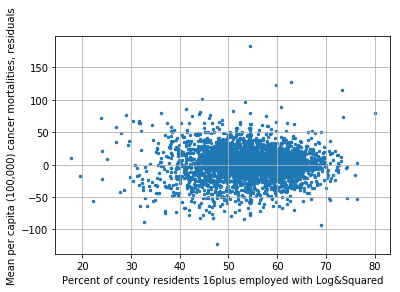

In [98]:
plt.scatter(X18, y - lr.predict(dfx18), s=6)
plt.grid()
plt.xlabel("Percent of county residents 16plus employed with Log&Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctEmployed16_Over_log_sqrd_residuals.png')

## 'PctUnemployed16_Over': Percent of county residents ages 16 and over unemployed

In [99]:
X['PctUnemployed16_Over_log'] = np.log(X['PctUnemployed16_Over'])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
lr.score(X_test, y_test)

0.6042360661573358

The logarithmic version decreased the accuracy, so it is removed from X.

In [103]:
X = X.drop(columns = 'PctUnemployed16_Over_log')

In [104]:
X['PctUnemployed16_Over_sqrd'] = X['PctUnemployed16_Over']**2

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
lr.score(X_test, y_test)

0.6072632745344374

The squared version decreased the accuracy, so it is dropped from X.

In [108]:
X = X.drop(columns = 'PctUnemployed16_Over_sqrd')

## 'PctPrivateCoverage': Percent of county residents with private health coverage

In [109]:
X['PctPrivateCoverage_log'] = np.log(X['PctPrivateCoverage'])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
lr.score(X_test, y_test)

0.61567640780425

The log version increased the accuracy, so it is added to the core feature set.

In [113]:
cancer['PctPrivateCoverage_log'] = np.log(cancer['PctPrivateCoverage'])

In [114]:
X['PctPrivateCoverage_sqrd'] = X['PctPrivateCoverage']**2

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
lr.score(X_test, y_test)

0.615524793034621

The squared version decreases accuracy, so it is dropped from X.

In [118]:
X = X.drop(columns = 'PctPrivateCoverage_sqrd')

In [119]:
X20 = np.array(cancer['PctPrivateCoverage'])
X20 = X20.reshape(-1, 1)

In [120]:
lr.fit(X20, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
lr.score(X20, y)

0.1490465755051258

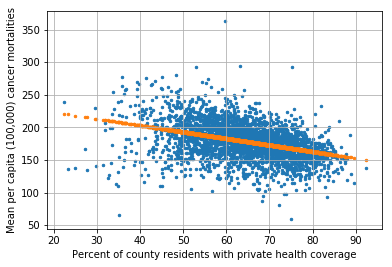

In [122]:
plt.scatter(X20, y, s=6)
plt.scatter(X20, lr.predict(X20), s=6)
plt.grid()
plt.xlabel("Percent of county residents with private health coverage", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctPrivateCoverage_actual_&_predicted_Y.png')

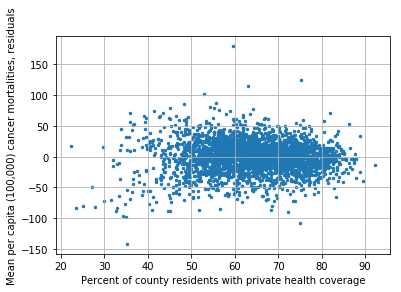

In [123]:
plt.scatter(X20, y - lr.predict(X20), s=6)
plt.grid()
plt.xlabel("Percent of county residents with private health coverage", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctPrivateCoverage_residuals.png')

In [124]:
X20.shape

(3047, 1)

In [125]:
dfx20 = pd.DataFrame(X20)
dfx20.head()

,0
0,56.6
1,56.5
2,61.8
3,76.1
4,75.5


In [126]:
dfx20['PctPrivateCoverage_log'] = np.log(X20)

In [127]:
dfx20.head()

,0,PctPrivateCoverage_log
0,56.6,4.036009
1,56.5,4.034241
2,61.8,4.123903
3,76.1,4.332048
4,75.5,4.324133


In [128]:
lr.fit(dfx20, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
lr.score(dfx20, y)

0.16638631963880068

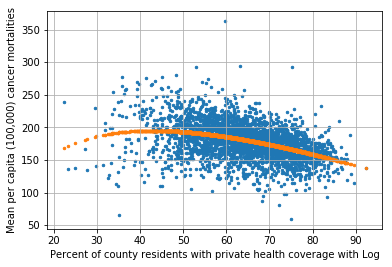

In [130]:
plt.scatter(X20, y, s=6) 
plt.scatter(X20, lr.predict(dfx20), s=6)
plt.grid()
plt.xlabel("Percent of county residents with private health coverage with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctPrivateCoverage_log_actual_&_predicted_Y.png')

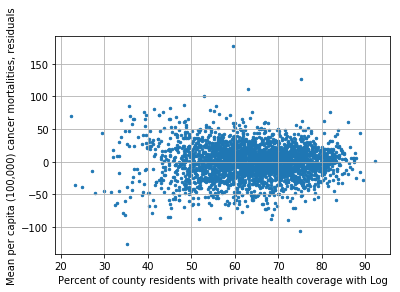

In [131]:
plt.scatter(X20, y - lr.predict(dfx20), s=6)
plt.grid()
plt.xlabel("Percent of county residents with private health coverage with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctPrivateCoverage_log_residuals.png')

## 'PctPrivateCoverageAlone': Percent of county residents with private health coverage alone (no public assistance)

In [132]:
X['PctPrivateCoverageAlone_log'] = np.log(X['PctPrivateCoverageAlone'])

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
lr.score(X_test, y_test)

0.6156376598735707

The logarithmic version decreased the accuracy, so it is dropped from X.

In [136]:
X = X.drop(columns = 'PctPrivateCoverageAlone_log')

In [137]:
X['PctPrivateCoverageAlone_sqrd'] = X['PctPrivateCoverageAlone']**2

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
lr.score(X_test, y_test)

0.6155597141751941

The squared version also decreased the accuracy, so it is dropped from X.

In [141]:
X = X.drop(columns = 'PctPrivateCoverageAlone_sqrd')

## 'PctEmpPrivCoverage': Percent of county residents with employee-provided private health coverage

In [142]:
X['PctEmpPrivCoverage_log'] = np.log(X['PctEmpPrivCoverage'])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
lr.score(X_test, y_test)

0.6164430255282353

The logarithmic version increased the accuracy, so its added to the core feature set.

In [146]:
cancer['PctEmpPrivCoverage_log'] = np.log(cancer['PctEmpPrivCoverage'])

In [147]:
X['PctEmpPrivCoverage_sqrd'] = X['PctEmpPrivCoverage']**2

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
lr.score(X_test, y_test)

0.6158691613726153

The squared version decreased the accuracy, so it is dropped from X.

In [151]:
X = X.drop(columns = 'PctEmpPrivCoverage_sqrd')

In [152]:
X22 = np.array(cancer['PctEmpPrivCoverage'])
X22 = X22.reshape(-1, 1)

In [153]:
lr.fit(X22, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
lr.score(X22, y)

0.07150245418052914

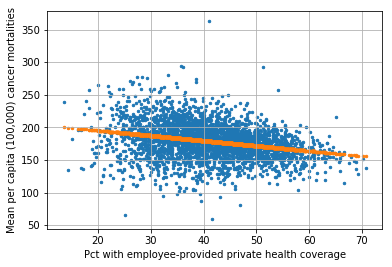

In [155]:
plt.scatter(X22, y, s=6)
plt.scatter(X22, lr.predict(X22), s=6)
plt.grid()
plt.xlabel("Pct with employee-provided private health coverage", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctEmpPrivCoverage_actual_&_predicted_Y.png')

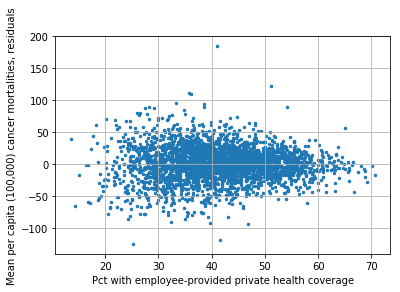

In [156]:
plt.scatter(X22, y - lr.predict(X22), s=6)
plt.grid()
plt.xlabel("Pct with employee-provided private health coverage", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctEmpPrivCoverage_residuals.png')

In [157]:
X22.shape

(3047, 1)

In [158]:
dfx22 = pd.DataFrame(X22)
dfx22.head()

,0
0,37.6
1,38.9
2,37.3
3,53.6
4,43.4


In [159]:
dfx22['PctEmpPrivCoverage_log'] = np.log(X22)

In [160]:
dfx22.head()

,0,PctEmpPrivCoverage_log
0,37.6,3.627004
1,38.9,3.660994
2,37.3,3.618993
3,53.6,3.981549
4,43.4,3.770459


In [161]:
lr.fit(dfx22, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
lr.score(dfx22, y)

0.07734874802472125

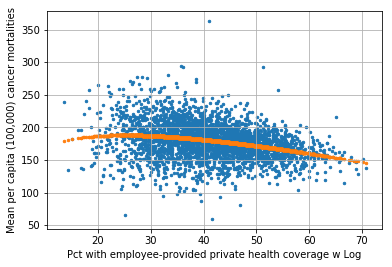

In [163]:
plt.scatter(X22, y, s=6) 
plt.scatter(X22, lr.predict(dfx22), s=6)
plt.grid()
plt.xlabel("Pct with employee-provided private health coverage w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctEmpPrivCoverage_log_actual_&_predicted_Y.png')

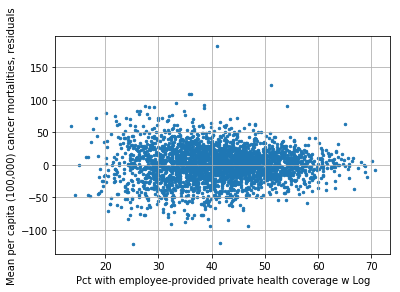

In [164]:
plt.scatter(X22, y - lr.predict(dfx22), s=6)
plt.grid()
plt.xlabel("Pct with employee-provided private health coverage w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctEmpPrivCoverage_log_residuals.png')

## 'PctPublicCoverage': Percent of county residents with government-provided health coverage

In [165]:
X['PctPublicCoverage_log'] = np.log(X['PctPublicCoverage'])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
lr.score(X_test, y_test)

0.6166174163269225

The log version increased the accuracy, so it is added to the core feature set.

In [169]:
cancer['PctPublicCoverage_log'] = np.log(cancer['PctPublicCoverage'])

In [170]:
X['PctPublicCoverage_sqrd'] = X['PctPublicCoverage']**2

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
lr.score(X_test, y_test)

0.6162095964079746

There is a decrease with the squared version, so it is dropped from X.

In [174]:
X = X.drop(columns = 'PctPublicCoverage_sqrd')

In [175]:
X23 = np.array(cancer['PctPublicCoverage'])
X23 = X23.reshape(-1, 1)

In [176]:
lr.fit(X23, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
lr.score(X23, y)

0.1636782250758716

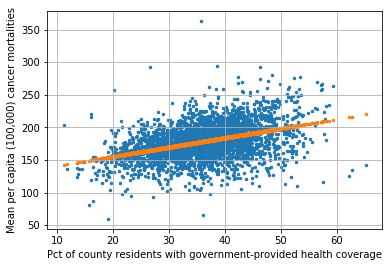

In [178]:
plt.scatter(X23, y, s=6)
plt.scatter(X23, lr.predict(X23), s=6)
plt.grid()
plt.xlabel("Pct of county residents with government-provided health coverage", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctPublicCoverage_actual_&_predicted_Y.png')

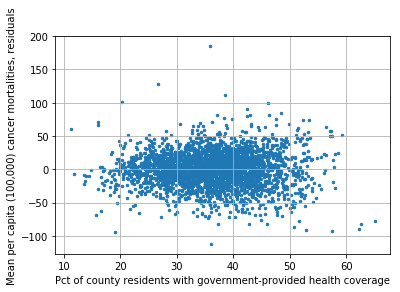

In [179]:
plt.scatter(X23, y - lr.predict(X23), s=6)
plt.grid()
plt.xlabel("Pct of county residents with government-provided health coverage", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctPublicCoverage_residuals.png')

In [180]:
X23.shape

(3047, 1)

In [181]:
dfx23 = pd.DataFrame(X23)
dfx23.head()

,0
0,43.8
1,37.4
2,36.7
3,23.7
4,38.0


In [182]:
dfx23['PctPublicCoverage_log'] = np.log(X23)

In [183]:
dfx23.head()

,0,PctPublicCoverage_log
0,43.8,3.779634
1,37.4,3.621671
2,36.7,3.602777
3,23.7,3.165475
4,38.0,3.637586


In [184]:
lr.fit(dfx23, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [185]:
lr.score(dfx23, y)

0.1650279558922968

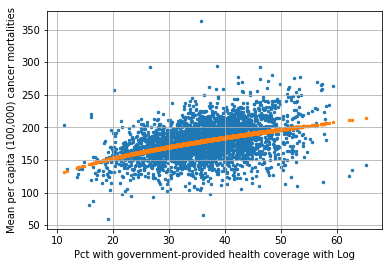

In [186]:
plt.scatter(X23, y, s=6) 
plt.scatter(X23, lr.predict(dfx23), s=6)
plt.grid()
plt.xlabel("Pct with government-provided health coverage with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctPublicCoverage_logactual_&_predicted_Y.png')

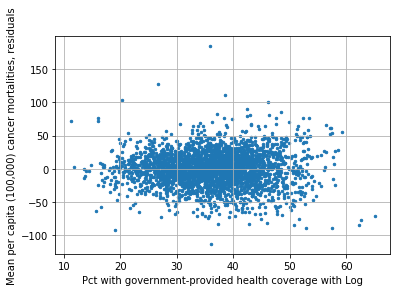

In [187]:
plt.scatter(X23, y - lr.predict(dfx23), s=6)
plt.grid()
plt.xlabel("Pct with government-provided health coverage with Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctPublicCoverage_log_residuals.png')

## 'PctPublicCoverageAlone': Percent of county residents with government-provided health coverage alone

In [188]:
X['PctPublicCoverageAlone_log'] = np.log(X['PctPublicCoverageAlone'])

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
lr.score(X_test, y_test)

0.6188694582498943

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [192]:
cancer['PctPublicCoverageAlone_log'] = np.log(cancer['PctPublicCoverageAlone'])

In [193]:
X['PctPublicCoverageAlone_sqrd'] = X['PctPublicCoverageAlone']**2

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
lr.score(X_test, y_test)

0.6196143101761382

The squared version further increased the accuracy, so it is added to the core feature set.

In [197]:
cancer['PctPublicCoverageAlone_sqrd'] = cancer['PctPublicCoverageAlone']**2

In [198]:
X24 = np.array(cancer['PctPublicCoverageAlone'])
X24 = X24.reshape(-1, 1)

In [199]:
lr.fit(X24, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [200]:
lr.score(X24, y)

0.20192223091567096

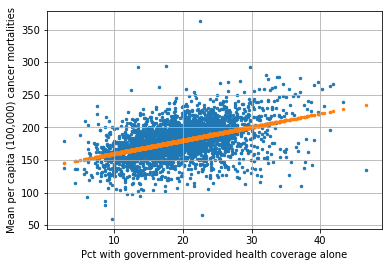

In [201]:
plt.scatter(X24, y, s=6)
plt.scatter(X24, lr.predict(X24), s=6)
plt.grid()
plt.xlabel("Pct with government-provided health coverage alone", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctPublicCoverageAlone_actual_&_predicted_Y.png')

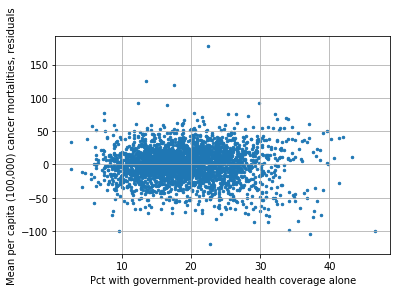

In [202]:
plt.scatter(X24, y - lr.predict(X24), s=6)
plt.grid()
plt.xlabel("Pct with government-provided health coverage alone", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctPublicCoverageAlone_residuals.png')

In [203]:
X24.shape

(3047, 1)

In [204]:
dfx24 = pd.DataFrame(X24)
dfx24.head()

,0
0,25.9
1,23.1
2,18.4
3,11.1
4,14.2


In [205]:
dfx24['PctPublicCoverageAlone_log'] = np.log(X24)

In [206]:
dfx24.head()

,0,PctPublicCoverageAlone_log
0,25.9,3.254243
1,23.1,3.139833
2,18.4,2.912351
3,11.1,2.406945
4,14.2,2.653242


In [207]:
lr.fit(dfx24, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [208]:
lr.score(dfx24, y)

0.20391581149903748

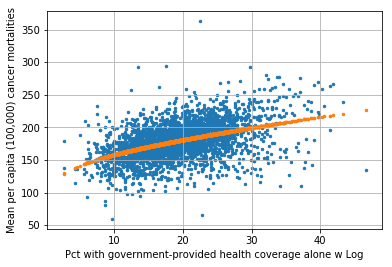

In [209]:
plt.scatter(X24, y, s=6) 
plt.scatter(X24, lr.predict(dfx24), s=6)
plt.grid()
plt.xlabel("Pct with government-provided health coverage alone w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctPublicCoverageAlone_log_actual_&_predicted_Y.png')

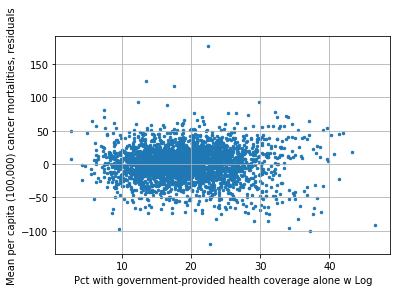

In [210]:
plt.scatter(X24, y - lr.predict(dfx24), s=6)
plt.grid()
plt.xlabel("Pct with government-provided health coverage alone w Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctPublicCoverageAlone_log_residuals.png')

In [211]:
dfx24['PctPublicCoverageAlone_sqrd'] = X24**2

In [212]:
dfx24.head()

,0,PctPublicCoverageAlone_log,PctPublicCoverageAlone_sqrd
0,25.9,3.254243,670.81
1,23.1,3.139833,533.61
2,18.4,2.912351,338.56
3,11.1,2.406945,123.21
4,14.2,2.653242,201.64


In [213]:
lr.fit(dfx24, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [214]:
lr.score(dfx24, y)

0.20542386560215975

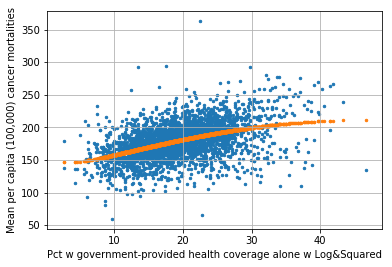

In [216]:
plt.scatter(X24, y, s=6) 
plt.scatter(X24, lr.predict(dfx24), s=6)
plt.grid()
plt.xlabel("Pct w government-provided health coverage alone w Log&Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctPublicCoverageAlone_log_sqrd_actual_&_predicted_Y.png')

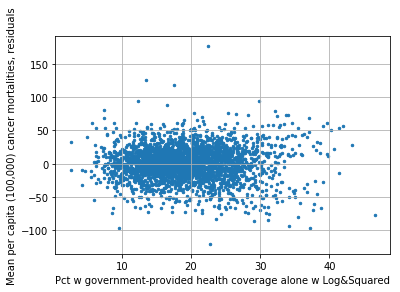

In [217]:
plt.scatter(X24, y - lr.predict(dfx24), s=6)
plt.grid()
plt.xlabel("Pct w government-provided health coverage alone w Log&Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctPublicCoverageAlone_log_sqrd_residuals.png')

## 'PctWhite': Percent of county residents who identify as White 

In [218]:
X['PctWhite_log'] = np.log(X['PctWhite'])

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
lr.score(X_test, y_test)

0.6195824888511468

There is a decrease in accuracy with the logarithmic version, so it is dropped from X.

In [222]:
X = X.drop(columns = 'PctWhite_log')

In [223]:
X['PctWhite_sqrd'] = X['PctWhite']**2

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [226]:
lr.score(X_test, y_test)

0.6199120383916481

There is an increase in accuracy, so the squared version is added to the core feature set.

In [227]:
cancer['PctWhite_sqrd'] = cancer['PctWhite']**2

In [228]:
X25 = np.array(cancer['PctWhite'])
X25 = X25.reshape(-1, 1)

In [229]:
lr.fit(X25, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [230]:
lr.score(X25, y)

0.03147075300165392

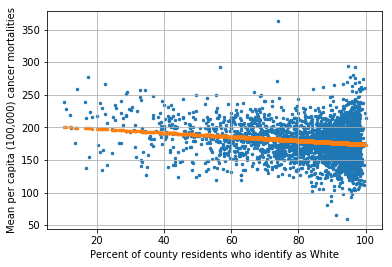

In [231]:
plt.scatter(X25, y, s=6)
plt.scatter(X25, lr.predict(X25), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as White", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctWhite_actual_&_predicted_Y.png')

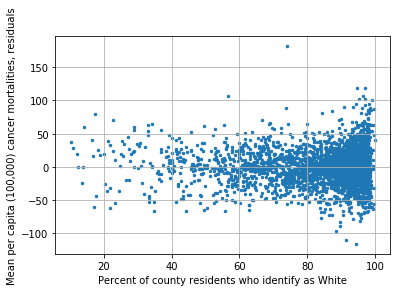

In [232]:
plt.scatter(X25, y - lr.predict(X25), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as White", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctWhite_residuals.png')

In [233]:
X25.shape

(3047, 1)

In [234]:
dfx25 = pd.DataFrame(X25)
dfx25.head()

,0
0,69.888387
1,78.973023
2,68.008455
3,91.402416
4,98.464853


In [235]:
dfx25['PctWhite_sqrd'] = X25**2

In [236]:
dfx25.head()

,0,PctWhite_sqrd
0,69.888387,4884.386583
1,78.973023,6236.738289
2,68.008455,4625.150003
3,91.402416,8354.401614
4,98.464853,9695.327320


In [237]:
lr.fit(dfx25, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [238]:
lr.score(dfx25, y)

0.03832392066039514

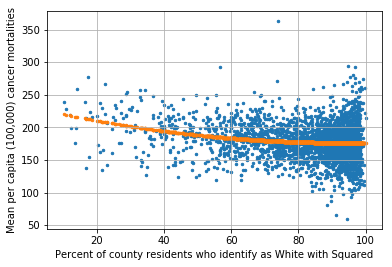

In [239]:
plt.scatter(X25, y, s=6) 
plt.scatter(X25, lr.predict(dfx25), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as White with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctWhite_sqrd_actual_&_predicted_Y.png')

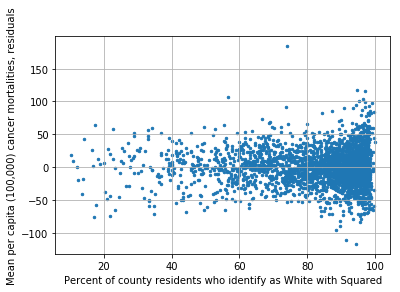

In [240]:
plt.scatter(X25, y - lr.predict(dfx25), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as White with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctWhite_sqrd_residuals.png')

## 'PctBlack': Percent of county residents who identify as Black

Because there are counties with no African-American residents, taking a logarithmic version of the 'PctBlack' feature will result in negative infinity values. Therefore, a logarithmic version of 'PctBlack' is not created.

In [241]:
X['PctBlack_sqrd'] = X['PctBlack']**2

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [244]:
lr.score(X_test, y_test)

0.6238504043898183

The squared version increased the accuracy, so it is added to the core feature set.

In [245]:
cancer['PctBlack_sqrd'] = cancer['PctBlack']**2

In [246]:
X26 = np.array(cancer['PctBlack'])
X26 = X26.reshape(-1, 1)

In [247]:
lr.fit(X26, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [248]:
lr.score(X26, y)

0.06606111063384412

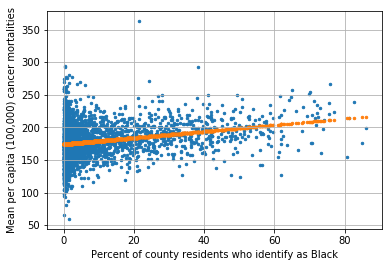

In [249]:
plt.scatter(X26, y, s=6)
plt.scatter(X26, lr.predict(X26), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as Black", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctBlack_actual_&_predicted_Y.png')

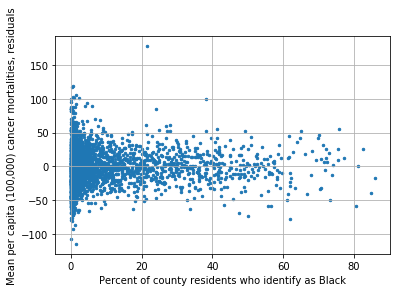

In [250]:
plt.scatter(X26, y - lr.predict(X26), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as Black", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctBlack_residuals.png')

In [251]:
X26.shape

(3047, 1)

In [252]:
dfx26 = pd.DataFrame(X26)
dfx26.head()

,0
0,27.947354
1,17.434808
2,28.675827
3,1.135566
4,0.363587


In [253]:
dfx26['PctBlack_sqrd'] = X26**2

In [254]:
lr.fit(dfx26, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [255]:
lr.score(dfx26, y)

0.06677124525799338

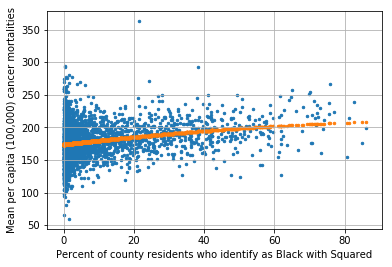

In [256]:
plt.scatter(X26, y, s=6) 
plt.scatter(X26, lr.predict(dfx26), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as Black with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PctBlack_sqrd_actual_&_predicted_Y.png')

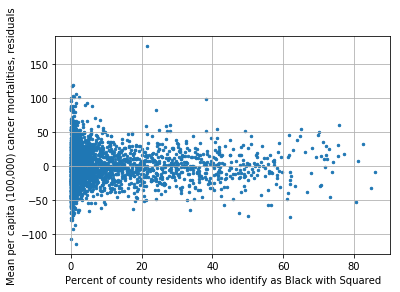

In [257]:
plt.scatter(X26, y - lr.predict(dfx26), s=6)
plt.grid()
plt.xlabel("Percent of county residents who identify as Black with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PctBlack_sqrd_residuals.png')

## 'PctAsian': Percent of county residents who identify as Asian

Because there are counties with no Asian residents, a logarithmic version is not created.

In [258]:
X['PctAsian_sqrd'] = X['PctAsian']**2

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [261]:
lr.score(X_test, y_test)

0.621491644524879

The squared version decreases accuracy, so it is dropped from X.

In [262]:
X = X.drop(columns = 'PctAsian_sqrd')

## 'PctOtherRace': Percent of county residents who identify in a category which is not White, Black, or Asian

Because there are counties with no people who identify as a race other than white, black, or Asian, a logarithmic version is not created.

In [263]:
X['PctOtherRace_sqrd'] = X['PctOtherRace']**2

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [266]:
lr.score(X_test, y_test)

0.6233251037840885

The squared version resulted in a drop in accuracy, so it is dropped from X.

In [267]:
X = X.drop(columns = 'PctOtherRace_sqrd')

## 'PctMarriedHouseholds': Percent of married households

In [268]:
X['PctMarriedHouseholds_log'] = np.log(X['PctMarriedHouseholds'])

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [271]:
lr.score(X_test, y_test)

0.6181775006717707

The logarithmic version resulted in a drop in accuracy, so it is dropped from X.

In [272]:
X = X.drop(columns = 'PctMarriedHouseholds_log')

In [273]:
X['PctMarriedHouseholds_sqrd'] = X['PctMarriedHouseholds']**2

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [276]:
lr.score(X_test, y_test)

0.619180568975811

The squared version resulted in a drop in accuracy as well, so it is dropped.

In [277]:
X = X.drop(columns = 'PctMarriedHouseholds_sqrd')

## 'BirthRate': Number of live births relative to number of women in county

There are counties with zero birthrate, so a logarithmic version cannot be used and is not created.

In [278]:
X['BirthRate_sqrd'] = X['BirthRate']**2

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [280]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [281]:
lr.score(X_test, y_test)

0.6227882705064515

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [282]:
X = X.drop(columns = 'BirthRate_sqrd')

## 'ALAND_SQMI': Land Area in Square Miles of Each County

In [283]:
X['ALAND_SQMI_log'] = np.log(X['ALAND_SQMI'])

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [286]:
lr.score(X_test, y_test)

0.6228668476148731

The logarithmic version resulted in a slight decrease in accuracy, so it is dropped from X.

In [287]:
X = X.drop(columns = 'ALAND_SQMI_log')

In [288]:
X['ALAND_SQMI_sqrd'] = X['ALAND_SQMI']**2

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [291]:
lr.score(X_test, y_test)

0.5420655641050585

The squared version of the variable resulted in a drop in accuracy, so it is dropped from X.

In [292]:
X = X.drop(columns = 'ALAND_SQMI_sqrd')

## AWATER_SQMI: Water Area in Square Miles of Each County

There are counties with no water area, so a logarithmic version of 'AWATER_SQMI' is not created, as values of zero will have a log value of negative infinity, a value unuseable by the linear regression algorithm.

In [293]:
X['AWATER_SQMI_sqrd'] = X['AWATER_SQMI']**2

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [296]:
lr.score(X_test, y_test)

0.6179183665413637

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [297]:
X = X.drop(columns = 'AWATER_SQMI_sqrd')

## 'INTPTLAT': Latitude of County Centroid

In [298]:
X['INTPTLAT_log'] = np.log(X['INTPTLAT'])

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [300]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [301]:
lr.score(X_test, y_test)

0.6238206533893846

The logarithmic version results in a drop in accuracy, so it is dropped from X.

In [302]:
X = X.drop(columns = 'INTPTLAT_log')

In [303]:
X['INTPTLAT_sqrd'] = X['INTPTLAT']**2

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [306]:
lr.score(X_test, y_test)

0.623324503567828

The squared version decreased the accuracy, so it is dropped from X.

In [307]:
X = X.drop(columns = 'INTPTLAT_sqrd')

## 'INTPTLONG': Longitude of County Centroids

There are negative values in this longitude feature, so a log version cannot be created.

In [308]:
X['INTPTLONG_sqrd'] = X['INTPTLONG']**2

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [311]:
lr.score(X_test, y_test)

0.6243876187281066

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [312]:
cancer['INTPTLONG_sqrd'] = cancer['INTPTLONG']**2

In [313]:
X34 = np.array(cancer['INTPTLONG'])
X34 = X34.reshape(-1, 1)

In [314]:
lr.fit(X34, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [315]:
lr.score(X34, y)

0.06915080264024787

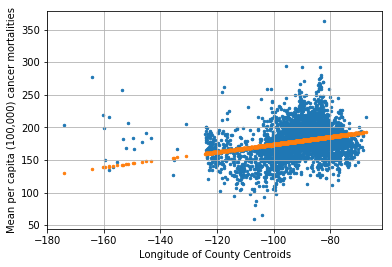

In [316]:
plt.scatter(X34, y, s=6)
plt.scatter(X34, lr.predict(X34), s=6)
plt.grid()
plt.xlabel("Longitude of County Centroids", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('INTPTLONG_actual_&_predicted_Y.png')

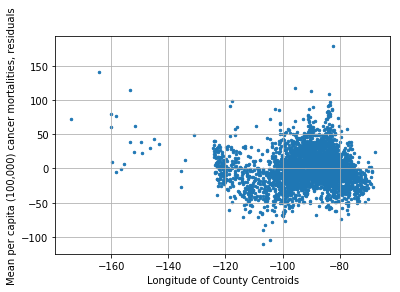

In [317]:
plt.scatter(X34, y - lr.predict(X34), s=6)
plt.grid()
plt.xlabel("Longitude of County Centroids", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('INTPTLONG_residuals.png')

In [318]:
X34.shape

(3047, 1)

In [319]:
dfx34 = pd.DataFrame(X34)
dfx34.head()

,0
0,-82.454058
1,-92.411037
2,-75.757807
3,-116.244376
4,-94.478164


In [320]:
dfx34['INTPTLONG_sqrd'] = X34**2

In [321]:
dfx34.head()

,0,INTPTLONG_sqrd
0,-82.454058,6798.671681
1,-92.411037,8539.799759
2,-75.757807,5739.245321
3,-116.244376,13512.754952
4,-94.478164,8926.123473


In [322]:
lr.fit(dfx34, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [323]:
lr.score(dfx34, y)

0.07347533464414657

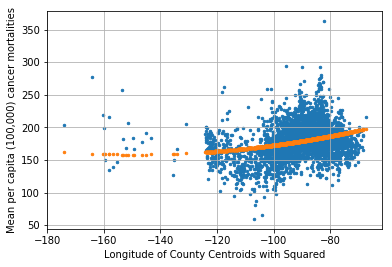

In [324]:
plt.scatter(X34, y, s=6) 
plt.scatter(X34, lr.predict(dfx34), s=6)
plt.grid()
plt.xlabel("Longitude of County Centroids with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('INTPTLONG_sqrd_actual_&_predicted_Y.png')

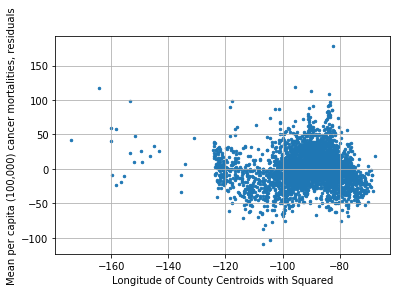

In [325]:
plt.scatter(X34, y - lr.predict(dfx34), s=6)
plt.grid()
plt.xlabel("Longitude of County Centroids with Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('INTPTLONG_sqrd_residuals.png')

## 'utmda_l1': L1 distance of county centroids from University of Texas MD Anderson Cancer Center

In [326]:
X['utmda_l1_log'] = np.log(X['utmda_l1'])

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [329]:
lr.score(X_test, y_test)

0.624385302052807

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [330]:
X = X.drop(columns = 'utmda_l1_log')

In [331]:
X['utmda_l1_sqrd'] = X['utmda_l1']**2

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [334]:
lr.score(X_test, y_test)

0.6243874413187578

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [335]:
X = X.drop(columns = 'utmda_l1_sqrd')

In [336]:
cancer.to_csv('cancer_ml4.csv')